# Exploratory Data Analysis of Wireline Logs

![](https://i.imgur.com/XAio1w4.jpg)

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.configure()

[jovian] It looks like Jovian is already configured ( check ~/.jovian/credentials.json ).
Do you want to overwrite the existing configuration? [y/N]: y
[jovian] Removing existing configuration..
[jovian] If you're a jovian-pro user please enter your company's organization ID on Jovian (otherwise leave it blank).
Organization ID: 
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Configuration complete!


In [120]:
jovian.commit(project='edalogs')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ramysaleem/edalogs" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ramysaleem/edalogs


'https://jovian.ai/ramysaleem/edalogs'

## Objective

This study explores and visualises petrophysical data of wireline logs and their subsets to analyse subsurface lithologies which describe what combination of rock layers is forming a given subsurface formation. This dataset includes 98 wells and its wireline logs, where python provides an excellent toolset for visualising the data from different views quickly and easily. We used log plots, histograms and cross plots (scatter plots) to analyse and explore well log data. 

## Methodology

## 1. Data loading 

The first step in this project is loading the required libraries and data.

In [110]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import math
import missingno as msno
import numpy as np
from pandas import DataFrame, Series

The objective of this project is to predict subsurface litholoies based on the log reading. The dataset consist of 98 wells and about one million rows and 29 columns. 

The dataset used in the project is from a Machine Learning competition run by Xeek and FORCE 2020 (https://xeek.ai/challenges/force-well-logs/overview). 

In [10]:
# Load dataset
data_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\projects-bootcamp\Machine Predicted Lithology\train.csv', sep=';')

In [11]:
# view the first 10 row in the dataset
data_df.head(10)

WELL  DEPTH_MD         X_LOC      Y_LOC       Z_LOC         GROUP  \
0  15/9-13   494.528  437641.96875  6470972.5 -469.501831  NORDLAND GP.   
1  15/9-13   494.680  437641.96875  6470972.5 -469.653809  NORDLAND GP.   
2  15/9-13   494.832  437641.96875  6470972.5 -469.805786  NORDLAND GP.   
3  15/9-13   494.984  437641.96875  6470972.5 -469.957794  NORDLAND GP.   
4  15/9-13   495.136  437641.96875  6470972.5 -470.109772  NORDLAND GP.   
5  15/9-13   495.288  437641.96875  6470972.5 -470.261780  NORDLAND GP.   
6  15/9-13   495.440  437641.96875  6470972.5 -470.413788  NORDLAND GP.   
7  15/9-13   495.592  437641.96875  6470972.5 -470.565796  NORDLAND GP.   
8  15/9-13   495.744  437641.96875  6470972.5 -470.717773  NORDLAND GP.   
9  15/9-13   495.896  437641.96875  6470972.5 -470.869781  NORDLAND GP.   

  FORMATION       CALI  RSHA      RMED  ...        ROP  DTS  DCAL      DRHO  \
0       NaN  19.480835   NaN  1.611410  ...  34.636410  NaN   NaN -0.574928   
1       NaN  19.468800   NaN  1.618070  ...  34.636410  NaN   NaN -0.570188   
2       NaN  19.468800   NaN  1.626459  ...  34.779556  NaN   NaN -0.574245   
3       NaN  19.459282   NaN  1.621594  ...  39.965164  NaN   NaN -0.586315   
4       NaN  19.453100   NaN  1.602679  ...  57.483765  NaN   NaN -0.597914   
5       NaN  19.453100   NaN  1.585567  ...  75.281410  NaN   NaN -0.601600   
6       NaN  19.462496   NaN  1.576569  ...  76.199951  NaN   NaN -0.598369   
7       NaN  19.468800   NaN  1.587011  ...  76.199951  NaN   NaN -0.602039   
8       NaN  19.468800   NaN  1.613674  ...  75.898796  NaN   NaN -0.614364   
9       NaN  19.468800   NaN  1.634622  ...  68.121262  NaN   NaN -0.621813   

   MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0        NaN   NaN   NaN  NaN                             65000   
1        NaN   NaN   NaN  NaN                             65000   
2        NaN   NaN   NaN  NaN                             65000   
3        NaN   NaN   NaN  NaN                             65000   
4        NaN   NaN   NaN  NaN                             65000   
5        NaN   NaN   NaN  NaN                             65000   
6        NaN   NaN   NaN  NaN                             65000   
7        NaN   NaN   NaN  NaN                             65000   
8        NaN   NaN   NaN  NaN                             65000   
9        NaN   NaN   NaN  NaN                             65000   

   FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                1.0  
1                                1.0  
2                                1.0  
3                                1.0  
4                                1.0  
5                                1.0  
6                                1.0  
7                                1.0  
8                                1.0  
9                                1.0  

[10 rows x 29 columns]

In [12]:
columns_names = data_df.columns

Let us look at the columns names in detailes.

In [13]:
columns_names

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

In [14]:
number_wells = data_df['WELL'].nunique()

In [15]:
print('Total number of wells is {:,.0f}'.format(number_wells))

Total number of wells is 98


## 2. Missing values

Wireline logs data can be missing for several reasons such as:
1. Cost considerations where the company chooses not to log the whole well to lower the cost. Instead, they run the log in zones of interest to lower the cost.  
2. Wireline tool failures and problems can arise from poor borehole conditions such as caving or tight wells.
3. Human error or data recording failures.    

Let us plot a general information about the datset.

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

Now let us calculate the number of missing values.

In [17]:
data_df.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [18]:
data_df.describe()

DEPTH_MD         X_LOC         Y_LOC         Z_LOC          CALI  \
count  1.170511e+06  1.159736e+06  1.159736e+06  1.159736e+06  1.082634e+06   
mean   2.184087e+03  4.856310e+05  6.681276e+06 -2.138527e+03  1.318568e+01   
std    9.971821e+02  3.455641e+04  1.281524e+05  9.709426e+02  3.798907e+00   
min    1.360860e+02  4.268988e+05  6.406641e+06 -5.395563e+03  2.344000e+00   
25%    1.418597e+03  4.547996e+05  6.591327e+06 -2.811502e+03  9.429712e+00   
50%    2.076605e+03  4.769203e+05  6.737311e+06 -2.042785e+03  1.255575e+01   
75%    2.864393e+03  5.201532e+05  6.784886e+06 -1.391866e+03  1.671075e+01   
max    5.436632e+03  5.726328e+05  6.856661e+06 -1.110860e+02  2.827900e+01   

                RSHA          RMED          RDEP          RHOB            GR  \
count  630650.000000  1.131518e+06  1.159496e+06  1.009242e+06  1.170511e+06   
mean       10.694664  4.986978e+00  1.069103e+01  2.284987e+00  7.091370e+01   
std       100.642597  5.467269e+01  1.139480e+02  2.532835e-01  3.423149e+01   
min         0.000100 -8.418695e-03  3.170056e-02  7.209712e-01  1.092843e-01   
25%         0.854120  9.140862e-01  9.102396e-01  2.092203e+00  4.762722e+01   
50%         1.399020  1.443584e+00  1.439000e+00  2.321228e+00  6.836763e+01   
75%         3.099348  2.680930e+00  2.557220e+00  2.488580e+00  8.903551e+01   
max      2193.904541  1.988616e+03  1.999887e+03  3.457820e+00  1.076964e+03   

       ...            ROP            DTS           DCAL           DRHO  \
count  ...  535071.000000  174613.000000  298833.000000  987857.000000   
mean   ...     137.367965     204.655019       1.223849       0.012196   
std    ...    1539.383558      71.068461      54.372859       7.477798   
min    ...      -0.117977      69.163177     -12.215459   -7429.338867   
25%    ...       5.628000     155.936707       0.148438      -0.009253   
50%    ...      17.799999     188.200653       0.557320       0.001752   
75%    ...      34.812794     224.645081       1.299655       0.021702   
max    ...   47015.125000     676.578125   10011.422852       2.836938   

           MUDWEIGHT           RMIC           ROPA            RXO  \
count  316151.000000  176160.000000  192325.000000  327427.000000   
mean        1.216329       7.796809      23.505069     -95.779496   
std        10.180834      89.741807      22.632800     348.980030   
min         0.125818       0.056586    -999.250122    -999.900024   
25%         0.143792       0.891272      11.281895       0.687681   
50%         0.155774       1.967156      20.131153       1.366672   
75%         1.168307       5.084564      31.138481       3.420790   
max       185.730927   10000.000000     742.797852   35930.671875   

       FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
count                      1.170511e+06                       1.170332e+06  
mean                       6.138598e+04                       1.164258e+00  
std                        1.389170e+04                       4.451180e-01  
min                        3.000000e+04                       1.000000e+00  
25%                        6.500000e+04                       1.000000e+00  
50%                        6.500000e+04                       1.000000e+00  
75%                        6.500000e+04                       1.000000e+00  
max                        9.900000e+04                       3.000000e+00  

[8 rows x 26 columns]

Also we can plot the missing values or Nans as matrix using the `missingno` library.

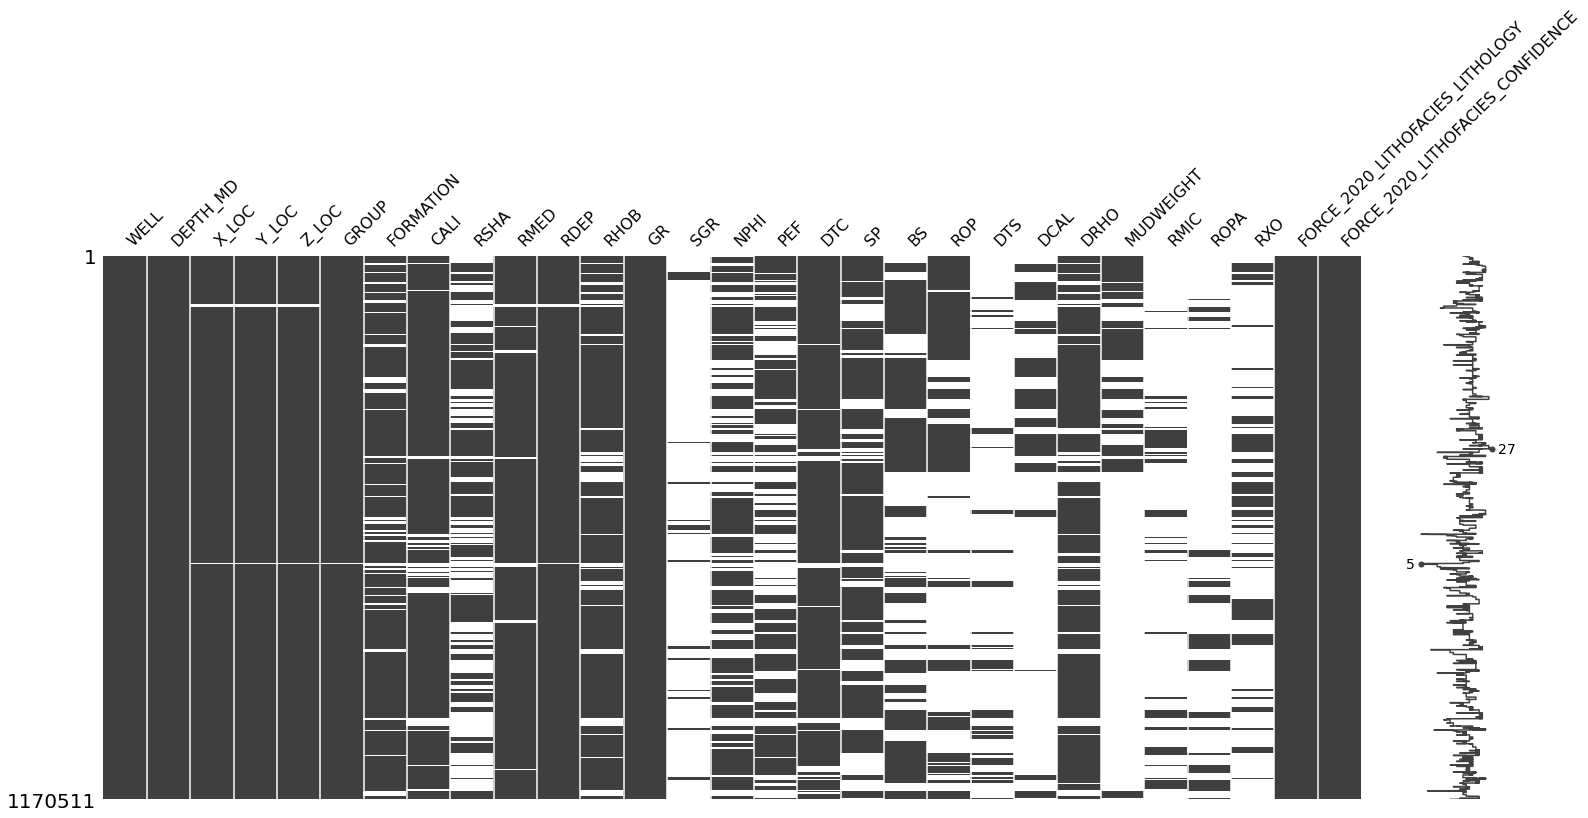

In [19]:
msno.matrix(data_df);

The plot shows the data density across all of the columns. The sparkline to the right show maximum or minimum null values in the data.

From the visualisation, we can see that only a few columns are complete WELL, DEPTH_MD, GR, GROUP, LITHOFACIES_LITHOLOGY and LITHOFACIES_CONFIDENCE.

Moreover we can use the bar plot to explore the missing values.

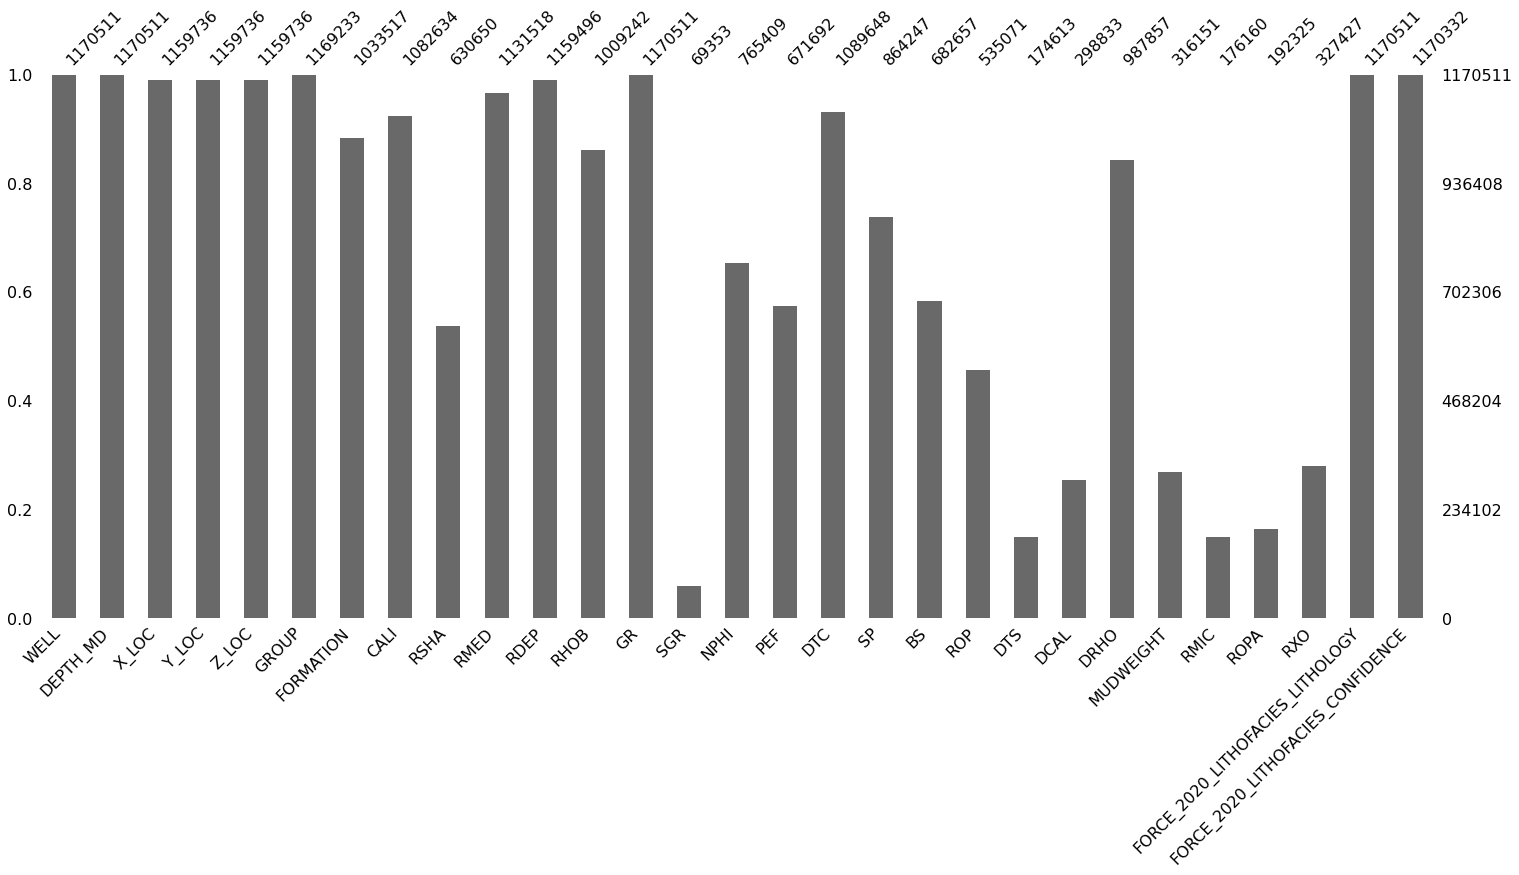

In [20]:
msno.bar(data_df);

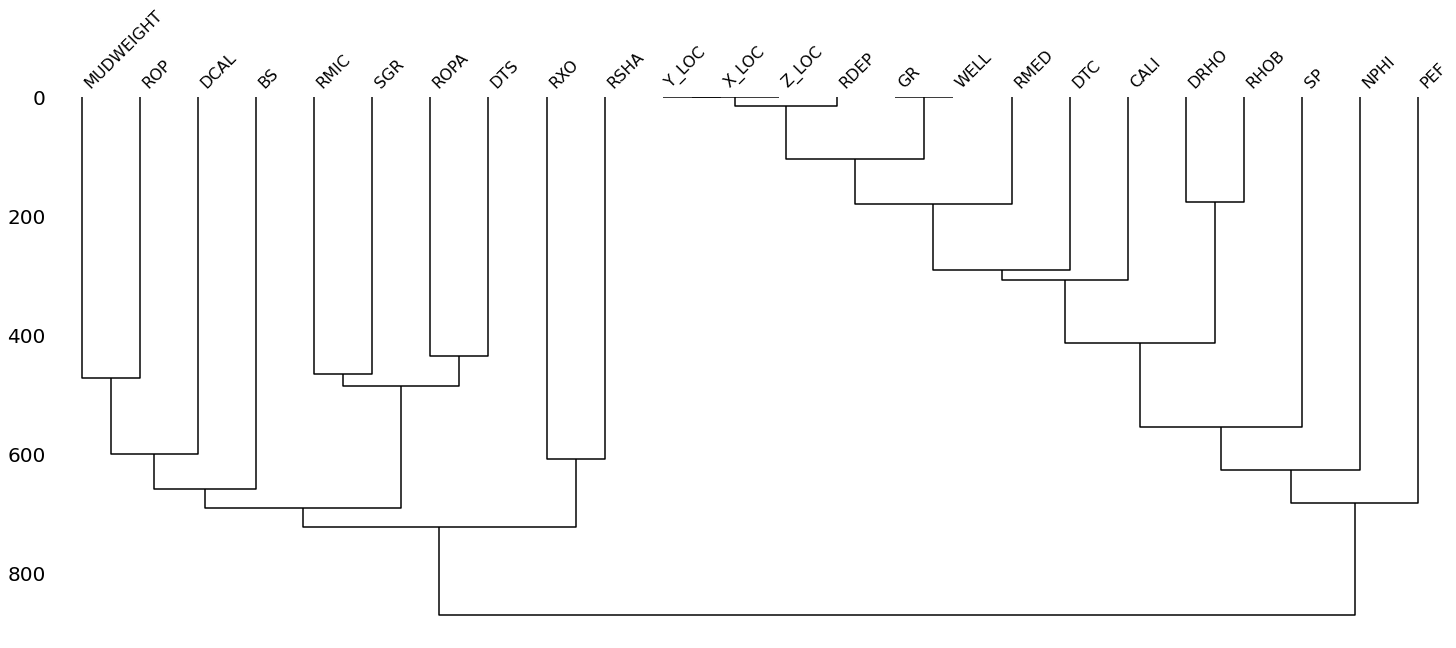

In [21]:
msno.dendrogram(data_df.drop(columns=['DEPTH_MD', 'GROUP', 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']));

Let's us look to the wells that have bit size curve since its important log to evaluate wireline logs data.

In [22]:
data_df['BS'].value_counts()

12.250001    289086
8.500000     222431
17.500000    126006
8.375000      17084
14.750000      8337
              ...  
17.450941         1
15.461132         1
12.334175         1
13.432160         1
9.403953          1
Name: BS, Length: 152, dtype: int64

Let's see if we have any missing values.

In [23]:
data_df['BS'].isna()

0           True
1           True
2           True
3           True
4           True
           ...  
1170506    False
1170507    False
1170508    False
1170509    False
1170510    False
Name: BS, Length: 1170511, dtype: bool

Let's keep just the wells that have bit size and Calliper log.

In [24]:
data_BS_df = data_df.dropna(subset=['BS', 'CALI']).copy()

In [25]:
data_BS_df.head(10)

WELL  DEPTH_MD        X_LOC      Y_LOC       Z_LOC         GROUP  \
18350  15/9-15   497.416  436817.9375  6462991.5 -472.414887  NORDLAND GP.   
18351  15/9-15   497.568  436817.9375  6462991.5 -472.566864  NORDLAND GP.   
18352  15/9-15   497.720  436817.9375  6462991.5 -472.718872  NORDLAND GP.   
18353  15/9-15   497.872  436817.9375  6462991.5 -472.870880  NORDLAND GP.   
18354  15/9-15   498.024  436817.9375  6462991.5 -473.022858  NORDLAND GP.   
18355  15/9-15   498.176  436817.9375  6462991.5 -473.174866  NORDLAND GP.   
18356  15/9-15   498.328  436817.9375  6462991.5 -473.326874  NORDLAND GP.   
18357  15/9-15   498.480  436817.9375  6462991.5 -473.478882  NORDLAND GP.   
18358  15/9-15   498.632  436817.9375  6462991.5 -473.630859  NORDLAND GP.   
18359  15/9-15   498.784  436817.9375  6462991.5 -473.782867  NORDLAND GP.   

      FORMATION       CALI      RSHA      RMED  ...        ROP  DTS      DCAL  \
18350       NaN  19.388424  1.606765  1.606765  ...  27.428537  NaN -6.611575   
18351       NaN  20.066446  1.595492  1.595492  ...  27.434877  NaN -5.933549   
18352       NaN  21.080965  1.577882  1.577882  ...  27.985224  NaN -4.919032   
18353       NaN  21.240883  1.564938  1.564938  ...  31.516979  NaN -4.759112   
18354       NaN  20.646976  1.536873  1.536873  ...  36.001575  NaN -5.353021   
18355       NaN  19.757746  1.477601  1.477601  ...  36.955418  NaN -6.242249   
18356       NaN  18.990797  1.427076  1.427076  ...  37.062843  NaN -7.009203   
18357       NaN  18.573223  1.393368  1.393368  ...  37.068943  NaN -7.426775   
18358       NaN  18.312973  1.370487  1.370487  ...  36.545715  NaN -7.687027   
18359       NaN  18.178219  1.350782  1.350782  ...  34.287422  NaN -7.821779   

           DRHO  MUDWEIGHT  RMIC  ROPA         RXO  \
18350       NaN   0.133007   NaN   NaN -999.900024   
18351       NaN   0.133007   NaN   NaN -999.900024   
18352       NaN   0.133007   NaN   NaN -999.900024   
18353       NaN   0.133007   NaN   NaN -999.900024   
18354       NaN   0.133007   NaN   NaN -999.900024   
18355       NaN   0.133007   NaN   NaN -999.900024   
18356       NaN   0.133007   NaN   NaN -999.900024   
18357       NaN   0.133007   NaN   NaN -999.900024   
18358 -0.015832   0.133007   NaN   NaN -999.900024   
18359 -0.017525   0.133007   NaN   NaN -999.900024   

       FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
18350                             65000                                3.0  
18351                             65000                                3.0  
18352                             65000                                3.0  
18353                             65000                                3.0  
18354                             65000                                3.0  
18355                             65000                                3.0  
18356                             65000                                3.0  
18357                             65000                                3.0  
18358                             65000                                3.0  
18359                             65000                                3.0  

[10 rows x 29 columns]

In [26]:
data_BS_df['BS'].isna().sum()

0

In [27]:
data_BS_df['CALI'].isna().sum()

0

In [28]:
numer_of_BS_wells = data_BS_df['WELL'].nunique()

In [29]:
print('We have {:.0f} wells that have bit size log.'.format(numer_of_BS_wells))

We have 68 wells that have bit size log.


In [30]:
wells_BS = data_BS_df['WELL'].unique()

This are the wells that have bit size logs.

In [31]:
wells_BS

array(['15/9-15', '16/1-2', '16/1-6 A', '16/10-1', '16/10-2', '16/10-3',
       '16/10-5', '16/11-1 ST3', '16/2-11 A', '16/2-16', '16/2-6',
       '16/4-1', '16/5-3', '16/7-4', '25/11-15', '25/11-5', '25/2-13 T4',
       '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-4', '25/6-1',
       '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7', '25/9-1',
       '26/4-1', '31/2-1', '31/2-19 S', '31/3-1', '31/3-2', '31/3-3',
       '31/3-4', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-33', '34/11-1', '34/12-1', '34/3-1 A',
       '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13', '34/8-1',
       '34/8-7 R', '35/11-10', '35/11-11', '35/11-12', '35/11-13',
       '35/11-15 S', '35/11-7', '35/12-1', '35/3-7 S', '35/4-1',
       '35/8-6 S', '35/9-10 S', '35/9-2', '35/9-5', '7/1-1', '7/1-2 S'],
      dtype=object)

## 3. Exploring the dataset

### 3.1 Bar Plot

Let's start exploring the data by ploting a bar plot.

In [32]:
px.bar(data_df.sample(1000), 
           title='Lithology vs. Confidence',
           x='FORMATION',
           y='FORCE_2020_LITHOFACIES_LITHOLOGY',
           log_y=True,
#            log_x=True,
           color='RSHA')

Also we can plot histogram to explore the sata.

In [33]:
fig = px.histogram(data_df.sample(1000), 
                   x='SP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of SP')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
fig = px.histogram(data_df.sample(1000), 
                   x='GR', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of GR',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(data_df.sample(1000), 
                   x='RHOB', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Density',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(data_df.sample(1000), 
                   x='NPHI', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Neutron porosity',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(data_df.sample(1000), 
                   x='ROP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Rate of pentration',
                   )
fig.update_layout(bargap=0.1)
fig.show()

We can see from this plot that the ROP have many outliers, which will be explored later in this study.

### 3.2 Scatter Plots

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:

In [38]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

Now let us create a new column named Lithology to reflect the lithofacies interpretation.

In [39]:
data_df['Lithology'] = data_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

In [40]:
data_df['Lithology']

0                    Shale
1                    Shale
2                    Shale
3                    Shale
4                    Shale
                ...       
1170506          Sandstone
1170507    Sandstone/Shale
1170508    Sandstone/Shale
1170509    Sandstone/Shale
1170510    Sandstone/Shale
Name: Lithology, Length: 1170511, dtype: object

Let us now plot a mini scatterplots of the density and neutron data and group them by lithology.

In [121]:
# plot_dn = sns.FacetGrid(data_df, col='Lithology', col_wrap=4, hue='Lithology')
# plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8, color='r')
# plot_dn.set(xlim=(-0.15, 1))
# plot_dn.set(ylim=(3, 1))
# plot_dn.add_legend();

Also we can plot our mini plots grouped by the wells.

In [103]:
# plot_dn = sns.FacetGrid(data_df, col='WELL', col_wrap=4, hue='Lithology')
# plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8, marker='+')
# plot_dn.set(xlim=(-0.15, 1))
# plot_dn.set(ylim=(3, 1))
# plot_dn.add_legend();

Moreover we can plot the same plot using the Group which is the level higher than the formation.

In [122]:
# plot_dn = sns.FacetGrid(data_df, col='GROUP', col_wrap=4, hue='Lithology')
# plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8, marker='+')
# plot_dn.set(xlim=(-0.15, 1))
# plot_dn.set(ylim=(3, 1))
# plot_dn.add_legend();

### 3.3 Pair Plot

We can plot a grid of multiple columns logs against each other. Before plotting the grid, let us select essential logs.

In [44]:
compo_logs = ['CALI', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

In [45]:
compo_df = data_df[compo_logs]
compo_df.head(10)

CALI         GR  NPHI      RHOB        PEF      RDEP      RMED  \
0  19.480835  80.200851   NaN  1.884186  20.915468  1.798681  1.611410   
1  19.468800  79.262886   NaN  1.889794  19.383013  1.795641  1.618070   
2  19.468800  74.821999   NaN  1.896523  22.591518  1.800733  1.626459   
3  19.459282  72.878922   NaN  1.891913  32.191910  1.801517  1.621594   
4  19.453100  71.729141   NaN  1.880034  38.495632  1.795299  1.602679   
5  19.453100  72.014420   NaN  1.879687  43.657482  1.804719  1.585567   
6  19.462496  72.588089   NaN  1.878731  42.236221  1.805498  1.576569   
7  19.468800  71.283051   NaN  1.867837  39.933563  1.808367  1.587011   
8  19.468800  69.721436   NaN  1.847233  39.163223  1.815813  1.613674   
9  19.468800  66.677727   NaN  1.836309  37.802933  1.813916  1.634622   

          DTC  DTS  
0  161.131180  NaN  
1  160.603470  NaN  
2  160.173615  NaN  
3  160.149429  NaN  
4  160.128342  NaN  
5  160.149292  NaN  
6  161.250381  NaN  
7  162.214416  NaN  
8  161.575104  NaN  
9  160.583359  NaN

Now let us drop all the Nan values to plot the data.

In [46]:
compo_df = compo_df.dropna()

In [123]:
# sns.pairplot(compo_df);

Pair plots allows us to quickly understand how data is distributed and correlated between the different logging curves.

## 4. Well Condition - Identifying Poor Borehole Data

We need to calculate the difference between the bit size and the calliper logs to analyse the well conditions. If the result is a negative value, this indicates that the borehole has shrunken in size resulting from shale swelling. On the other hand, a positive value indicates that the borehole has increased in size due to caving resulting from a fragile formation.

In [48]:
data_BS_df = data_df.dropna(subset=['BS', 'CALI']).copy()

In [49]:
data_BS_df['Delta_cals'] = data_BS_df['CALI'] - data_BS_df['BS']

In [50]:
data_BS_df['Delta_cals']

18350     -6.611578
18351     -5.933556
18352     -4.919037
18353     -4.759119
18354     -5.353025
             ...   
1170506   -0.076830
1170507   -0.120756
1170508   -0.149752
1170509   -0.186221
1170510   -0.205090
Name: Delta_cals, Length: 657745, dtype: float64

In [116]:
# px.scatter(data_BS_df,
#        x='Delta_cals',
#        y='DEPTH_MD',
#           log_y=True)

Before we plot the data we need to group them by wells and calculate the number of rows needed.

In [52]:
well_group = data_df.groupby('WELL')

In [53]:
data_BS_df['Delta_cals']

18350     -6.611578
18351     -5.933556
18352     -4.919037
18353     -4.759119
18354     -5.353025
             ...   
1170506   -0.076830
1170507   -0.120756
1170508   -0.149752
1170509   -0.186221
1170510   -0.205090
Name: Delta_cals, Length: 657745, dtype: float64

In [115]:
# uncomment the following cells to see the plots.

In [54]:
# fig, axs = plt.subplots(5, 3, figsize=(20, 20))
# for (name, df), ax in zip(well_group, axs.flat):
#     df.plot(kind='scatter', x='NPHI', y='RHOB', 
#                     ax=ax, cmap='jet', vmin=-1, vmax=10, c='FORCE_2020_LITHOFACIES_CONFIDENCE')
#     ax.set_xlim(-0.15,1)
#     ax.set_ylim(3,1)
#     ax.set_title(name)
# plt.tight_layout()

Now let us group the data by Lithology to evaluate the quality of the logs.

In [55]:
# Group our data
well_group_2 = data_df.groupby('Lithology')

In [56]:
data_BS_df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'Lithology', 'Delta_cals'],
      dtype='object')

In [57]:
# fig, axs = plt.subplots(5, 3, figsize=(20, 20))
# for (name, df), ax in zip(well_group_2, axs.flat):
#     df.plot(kind='scatter', x='NPHI', y='RHOB', 
#                     ax=ax, cmap='jet', vmin=-1, vmax=10, c='FORCE_2020_LITHOFACIES_CONFIDENCE')
#     ax.set_xlim(-0.15,1)
#     ax.set_ylim(3,1)
#     ax.set_title(name)
# plt.tight_layout()

From the plot, we can see that all lithologies have a large degree of **good** data in them.

## 5. Outliers

In [111]:
# fig = px.box(compo_df.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
# fig.update_yaxes(matches=None)

# for i in range(len(fig["data"])):
#     yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
#     fig.layout[yaxis_name].showticklabels = True

# fig.update_layout(legend = dict(bgcolor = 'white'))
# fig.update_layout(plot_bgcolor='white')

# fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# fig.show()

In [112]:
# fig = px.box(data_df.iloc[:,:10].sample(100).melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
# fig.update_yaxes(matches=None)

# for i in range(len(fig["data"])):
#     yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
#     fig.layout[yaxis_name].showticklabels = True

# fig.update_layout(legend = dict(bgcolor = 'white'))
# fig.update_layout(plot_bgcolor='white')

# fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# fig.show()

In [113]:
# fig = px.box(data_df.iloc[:,10:20].sample(100).melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
# fig.update_yaxes(matches=None)

# for i in range(len(fig["data"])):
#     yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
#     fig.layout[yaxis_name].showticklabels = True

# fig.update_layout(legend = dict(bgcolor = 'white'))
# fig.update_layout(plot_bgcolor='white')

# fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# fig.show()

In [61]:
fig = px.box(data_df.iloc[:,20:27].sample(100).melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

We can see the data contains many outliers.

In [114]:
# df_prim_boxplot = pd.melt(data_df[['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']])

# plt.figure(figsize=(20,10))
# ax = sns.boxplot(x=df_prim_boxplot["variable"], y=df_prim_boxplot["value"], showfliers = True, width=0.5)
# ax.set(xlabel='Lithology Variable', ylabel='Lithology Value')
# ax.set_title("Boxplot of Primary Lithology Variables")
# plt.show()

In [124]:
# df_prim_log_boxplot = pd.melt(np.log(data_df[['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']])) 

# plt.figure(figsize=(20,10))
# ax = sns.boxplot(x=df_prim_log_boxplot["variable"], y=df_prim_log_boxplot["value"], showfliers = True, width=0.5)
# ax.set(xlabel='Lithology Variable', ylabel='Lithology Value (Log Scale)')
# ax.set_title("Boxplot of Primary Lithology Variables on a Log Scale")
# plt.show()

## 6. Wireline logs classes - Identify Imbalance classes

In [64]:
data_df['Lithology'].value_counts()

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
Name: Lithology, dtype: int64

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/2771812999.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



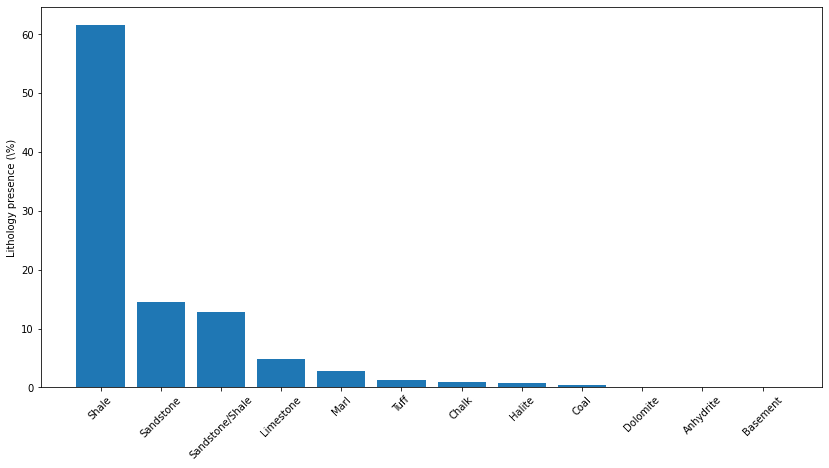

In [65]:
counts = data_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

names = []
percentage = []

N = data_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)');

In [66]:
data_df['Lithology'].describe()

count     1170511
unique         12
top         Shale
freq       720803
Name: Lithology, dtype: object

We can see that the data has strong imbalance classes with shale represent 60% of the data. 

## 7. Wireline Logs Visualization

Lets create a function to plot the wireline logs data.

In [67]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style

  Input:

  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display

  column_semilog is specific for resistivity column; if your resistivity is
    in column 3, specify as: column_semilog=2. Default is None, so if 
    you don't specify, the resistivity will be plotted in normal axis instead
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)
  """
  
  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis()    

  plt.tight_layout(tight_layout)
  plt.show()   

Exaple of well 15/9-13.

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/327518505.py:118: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



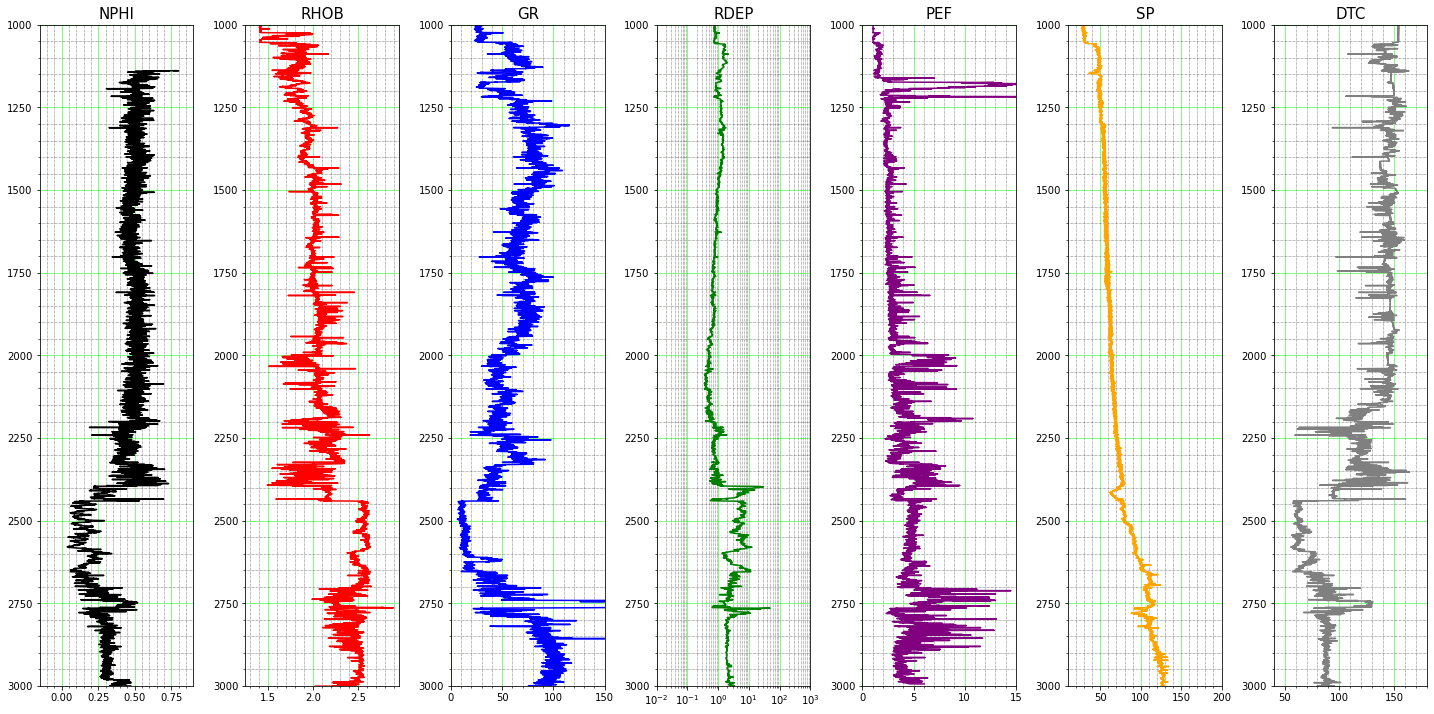

In [68]:
# Leave all by default
column_list = ['NPHI', 'RHOB', 'GR', 'RDEP', 'PEF', 'SP', 'DTC']
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
column_min  = [-0.15, 1.25, 0, 0.01, 0, 10, 40]
column_max  = [0.9, 2.95, 150, 1000, 15, 200, 180]

well_log_display(data_df.loc[data_df['WELL'] == '15/9-13'], 'DEPTH_MD', 
                 column_list, column_semilog=3, 
                 column_min=column_min,column_max=column_max, 
                 min_depth=1000, max_depth=3000, colors=colors, title_size=15)

Example of well 35/11-6.

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/327518505.py:118: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



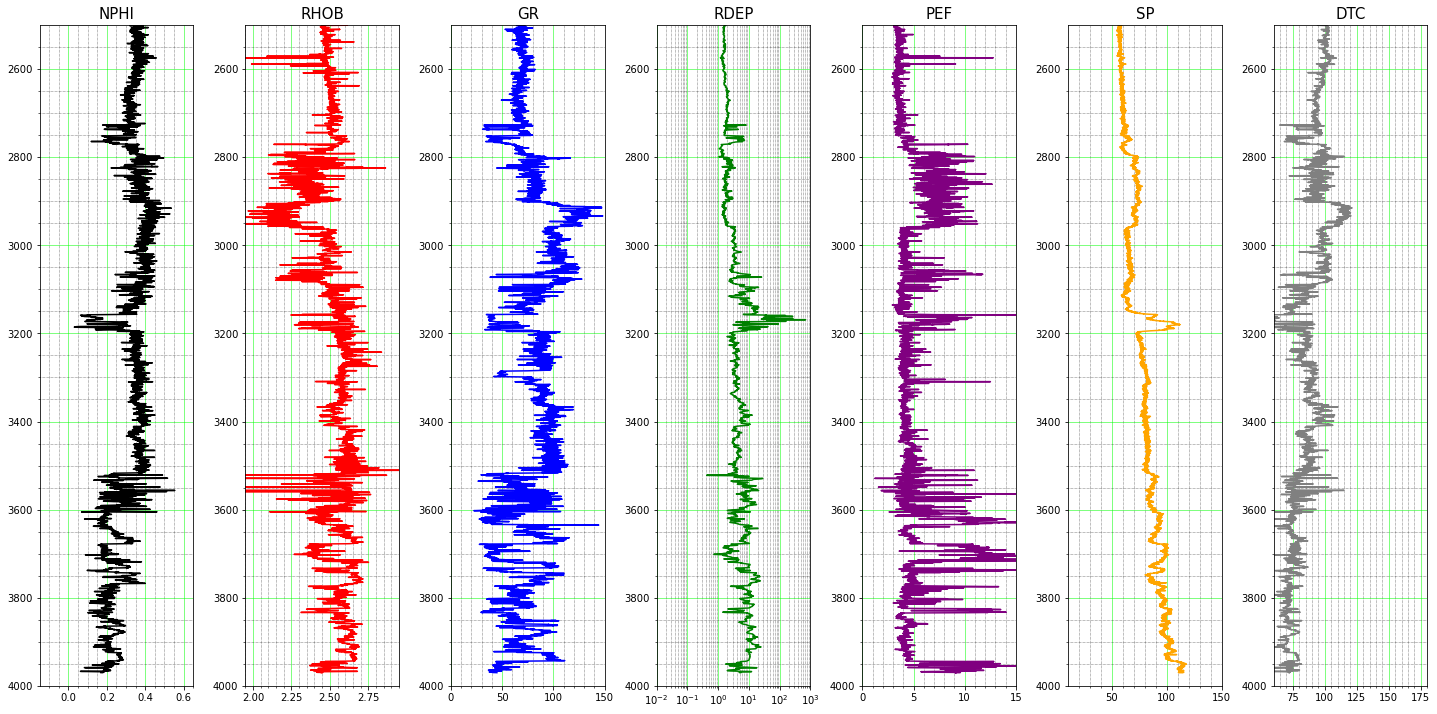

In [69]:
# Leave all by default
column_list = ['NPHI', 'RHOB', 'GR', 'RDEP', 'PEF', 'SP', 'DTC']
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
column_min  = [-0.15, 1.95, 0, 0.01, 0, 10, 60]
column_max  = [0.65, 2.95, 150, 1000, 15, 150, 180]

well_log_display(data_df.loc[data_df['WELL'] == '35/11-6'], 'DEPTH_MD', 
                 column_list, column_semilog=3, 
                 column_min=column_min,column_max=column_max, 
                 min_depth=2500, max_depth=4000, colors=colors, title_size=15)

Example of well 34/2-4.

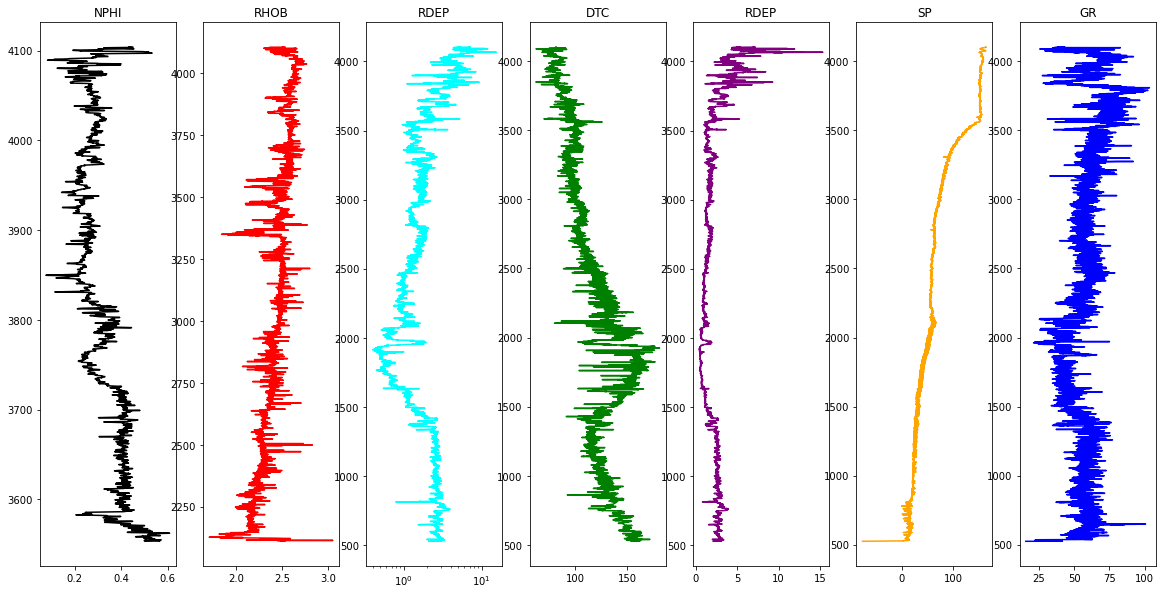

In [70]:
# define what logs are we going to use: NPHI, RHOB, RDEP, DTC, DTE, SP, GR
logs = ['NPHI', 'RHOB', 'RDEP', 'DTC', 'RDEP', 'SP', 'GR']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'cyan', 'green', 'purple', 'orange', 'blue']

for i in range(len(logs)):
  if i == 2:
    # for resistivity, semilog plot
    ax[i].semilogx(data_df.loc[data_df['WELL'] == '34/2-4'][logs[i]], data_df.loc[data_df['WELL'] == '34/2-4']['DEPTH_MD'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(data_df.loc[data_df['WELL'] == '34/2-4'][logs[i]], data_df.loc[data_df['WELL'] == '34/2-4']['DEPTH_MD'], color=colors[i])
  
  ax[i].set_title(logs[i])

plt.show()

## 8. Lithofacies Track Visualization

Now let us define a function that creates a plot with log curves, as well as a lithofacies track.

Let us load clean, complete and without Nans data frame, which you have cleaned before. The preprocessing of preparing the data will be explained in detail in part two of the study.

In [71]:
logs_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\projects-bootcamp\Machine Predicted Lithology\logs_clean_data.csv')

In [72]:
logs_df

Depth         X_LOC      Y_LOC       Z_LOC       CALI         GR  \
0         494.5280  437641.96875  6470972.5 -469.501831  19.480835  80.200851   
1         494.6800  437641.96875  6470972.5 -469.653809  19.468800  79.262886   
2         494.8320  437641.96875  6470972.5 -469.805786  19.468800  74.821999   
3         494.9840  437641.96875  6470972.5 -469.957794  19.459282  72.878922   
4         495.1360  437641.96875  6470972.5 -470.109772  19.453100  71.729141   
...            ...           ...        ...         ...        ...        ...   
2341017  3169.3124       0.00000        0.0    0.000000   8.423170  77.654900   
2341018  3169.4644       0.00000        0.0    0.000000   8.379244  75.363937   
2341019  3169.6164       0.00000        0.0    0.000000   8.350248  66.452843   
2341020  3169.7684       0.00000        0.0    0.000000   8.313779  55.784817   
2341021  3169.9204       0.00000        0.0    0.000000   8.294910  48.432129   

         RSHA      RMED      RDEP      RHOB  NPHI        PEF         DTC  DTS  \
0         0.0  0.207206  0.254954  1.884186   0.0  20.915468  161.131180  0.0   
1         0.0  0.208997  0.254220  1.889794   0.0  19.383013  160.603470  0.0   
2         0.0  0.211243  0.255449  1.896523   0.0  22.591518  160.173615  0.0   
3         0.0  0.209942  0.255638  1.891913   0.0  32.191910  160.149429  0.0   
4         0.0  0.204847  0.254137  1.880034   0.0  38.495632  160.128342  0.0   
...       ...       ...       ...       ...   ...        ...         ...  ...   
2341017   0.0  0.000000  0.000000  2.527984   0.0   4.586425    0.000000  0.0   
2341018   0.0  0.000000  0.000000  2.537613   0.0   7.019858    0.000000  0.0   
2341019   0.0  0.000000  0.000000  2.491860   0.0   9.049782    0.000000  0.0   
2341020   0.0  0.000000  0.000000  2.447539   0.0   8.903917    0.000000  0.0   
2341021   0.0  0.000000  0.000000  2.430716   0.0   9.150043    0.000000  0.0   

                SP       ROP   BS  Formation  Strata  litho_real  
0        24.612379  1.539533  0.0         67       6           2  
1        23.895531  1.539533  0.0         67       6           2  
2        23.916357  1.541324  0.0         67       6           2  
3        23.793688  1.601682  0.0         67       6           2  
4        24.104078  1.759545  0.0         67       6           2  
...            ...       ...  ...        ...     ...         ...  
2341017   0.000000  1.442078  8.5          7      11           0  
2341018   0.000000  1.447535  8.5          7      11           1  
2341019   0.000000  1.448572  8.5          7      11           1  
2341020   0.000000  1.447465  8.5          7      11           1  
2341021   0.000000  1.414738  8.5          7      11           1  

[2341022 rows x 20 columns]

In [73]:
train_data = pd.read_csv(r'C:\Users\r04ra18\Desktop\projects-bootcamp\Machine Predicted Lithology\train.csv', sep=';', memory_map=True)
test_data = pd.read_csv(r'C:\Users\r04ra18\Desktop\projects-bootcamp\Machine Predicted Lithology\train.csv', sep=';', memory_map=True)

In [74]:
raw_data=pd.concat([train_data, test_data], axis=0).reset_index().rename(columns={'index': 'idx'})
raw_data.loc[train_data.index, 'Dataset'] = 'Train'
raw_data.loc[train_data.index.max()+1:, 'Dataset'] = 'Test'

Let us define our training data to plot few wells from it.

In [75]:
train_wells = raw_data['WELL'][raw_data.Dataset=='Train'].unique()
print('No of train wells: %s' % len(train_wells))

No of train wells: 98


Let us define a series of wells to use for sellection of our wells. 

In [76]:
well = raw_data['WELL']
well

0          15/9-13
1          15/9-13
2          15/9-13
3          15/9-13
4          15/9-13
            ...   
2341017    7/1-2 S
2341018    7/1-2 S
2341019    7/1-2 S
2341020    7/1-2 S
2341021    7/1-2 S
Name: WELL, Length: 2341022, dtype: object

Let us define a names of wells to use to plot the lithology track. 

In [77]:
wells_names = well.unique()
wells_names[0]

'15/9-13'

Now let us select few logs plot and predict the lithology track.

In [78]:
selected_logs = ['CALI', 'GR', 'RHOB', 'NPHI', 'RSHA', 'RDEP', 'PEF']

Let us now define the facies strata and map them with colours to create a dictionary.

In [79]:
# Some parameters
#'DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS'
feature_names = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'GR', 'RSHA', 'RMED', 'RDEP', 'RHOB', 
                 'NPHI', 'PEF', 'DTC', 'DTS', 'SP', 'ROP', 'BS']#
facies_names = lithology_keys.values()
facies_colors = ['darkorange', '#228B22', 'grey', 'cyan', 'gold', 'lightseagreen', 
                 'lawngreen', 'lightblue', 'tan', '#FF4500', '#000000', 'magenta']
#
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_names):
    facies_color_map[label] = facies_colors[ind]

In [80]:
facies_color_map

{'Sandstone': 'darkorange',
 'Sandstone/Shale': '#228B22',
 'Shale': 'grey',
 'Marl': 'cyan',
 'Dolomite': 'gold',
 'Limestone': 'lightseagreen',
 'Chalk': 'lawngreen',
 'Halite': 'lightblue',
 'Anhydrite': 'tan',
 'Tuff': '#FF4500',
 'Coal': '#000000',
 'Basement': 'magenta'}

Now define a function that creates a plot with log curves, as well as a lithofacies track. 
This plot will be flexible, in that we can provide a list of curve mnemonics that 
we want to include in the plot. The following function created by *DapoA*. 

In [81]:
def make_facies_log_plot(logs, curves, well_name, facies_colors):
        
    #make sure logs are sorted by depth
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')

    colours=['k','b','r','g','m','c','lime','gold','sienna']
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(logs['litho_real'].values.reshape(-1, 1),50,axis=1)
    
    num_curves = len(curves)
    f, ax = plt.subplots(nrows=1, ncols=num_curves+1, figsize=(num_curves*2, 12))
    
    for ic, col in enumerate(curves):
        
        # if the curve doesn't exist, make it zeros
        if np.all(np.isnan(logs[col])):
            curve = np.empty(logs[col].values.shape)
            curve[:] = np.nan
            
        else:
            curve = logs[col]
            
        ax[ic].plot(curve, logs.Depth,colours[ic])
        ax[ic].set_xlabel(col)
        if ic != 0:
            ax[ic].set_yticklabels([]);

    # make the lithfacies column
    im=ax[num_curves].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=len(facies_colors)-1)
    
    divider = make_axes_locatable(ax[num_curves])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((13*' ').join(['  SS', 'SS-Sh', 'Sh', 
                                ' Marl', 'Dol', 'Lims', 'Chlk ', 
                                '  Hal', 'Anhy', 'Tuf', 'Coal', 'Bsmt']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_ylabel("DEPTH")
    ax[num_curves].set_xlabel('Lithology')
    ax[num_curves].set_yticklabels([])
    ax[num_curves].set_xticklabels([])
    
    f.suptitle('Well: %s'% well_name, fontsize=14,y=0.94)

In [82]:
def compare_facies_plot(logs, well_name, facies_name, facies_colors, vmax):
    
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['litho_real'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['litho_pred'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RDEP, logs.Depth, '-b')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    ax[4].plot(logs.PEF, logs.Depth, '-', color='black')
    ax[5].plot(logs.DTC, logs.Depth, '-', color='m')
    im1 = ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=vmax)
    im2 = ax[7].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=vmax)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((55*' ').join(facies_name))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_ylabel("DEPTH")
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RDEP")
    ax[1].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("PEF")
    ax[4].set_xlim(logs.PEF.min(),logs.PEF.max())
    ax[5].set_xlabel("DTC")
    ax[5].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[6].set_xlabel('litho_real')
    ax[7].set_xlabel('litho_pred')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); ax[7].set_yticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    f.suptitle('Well: %s' % well_name, fontsize=14,y=0.94)    

In [87]:
def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)

Example of plotting well number 13:

In [118]:
well_no = 13

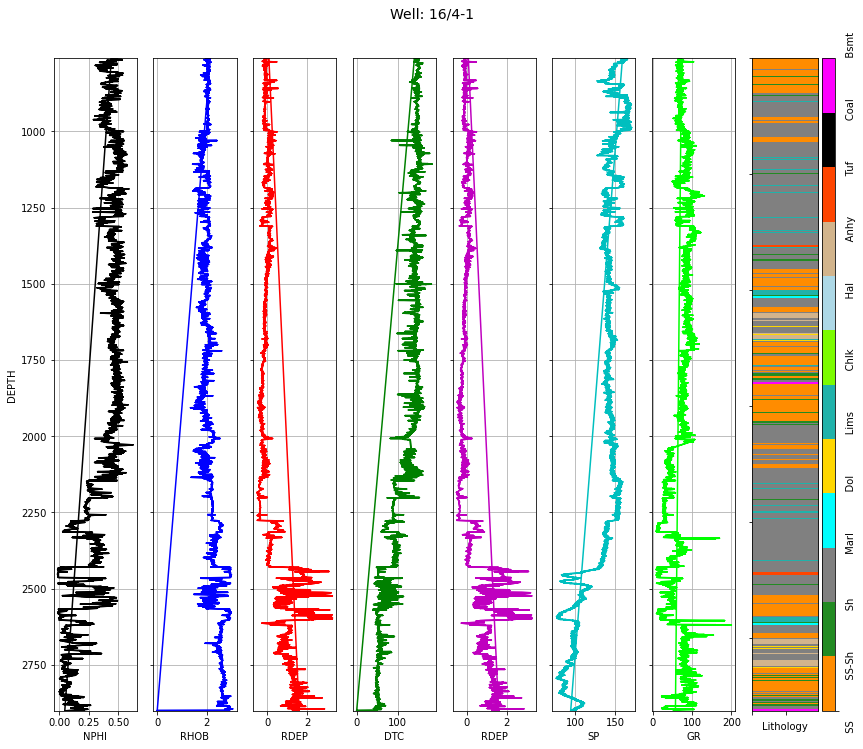

In [119]:
make_facies_log_plot(logs_df[well==train_wells[well_no]], logs, wells_names[well_no], facies_colors)

Example of plotting well number 30:

In [90]:
well_no = 30

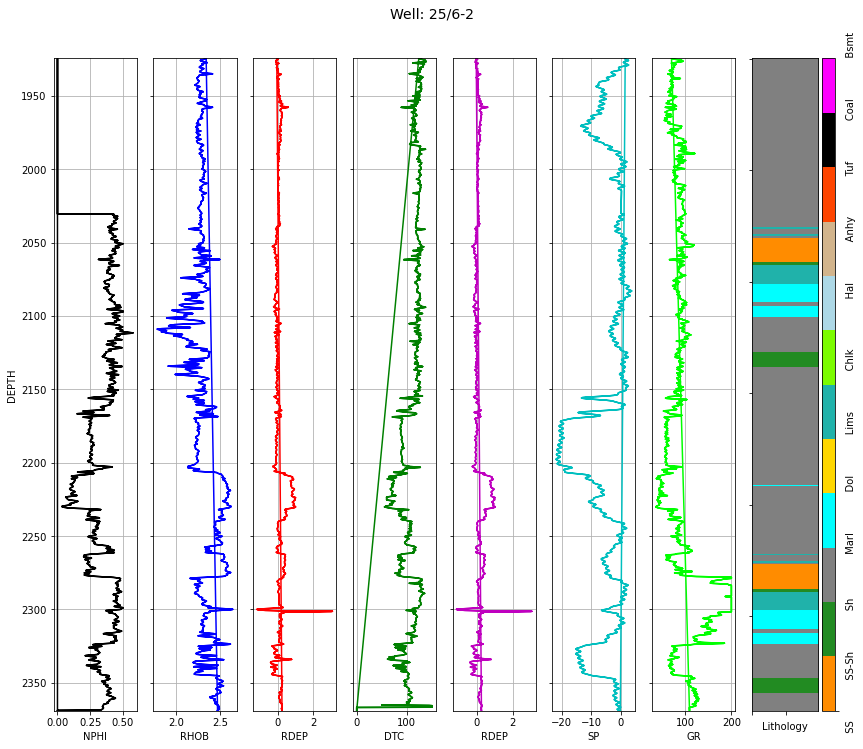

In [91]:
make_facies_log_plot(logs_df[well==train_wells[well_no]], logs, wells_names[well_no], facies_colors)

Example of plotting well number 65:

In [92]:
well_no = 65

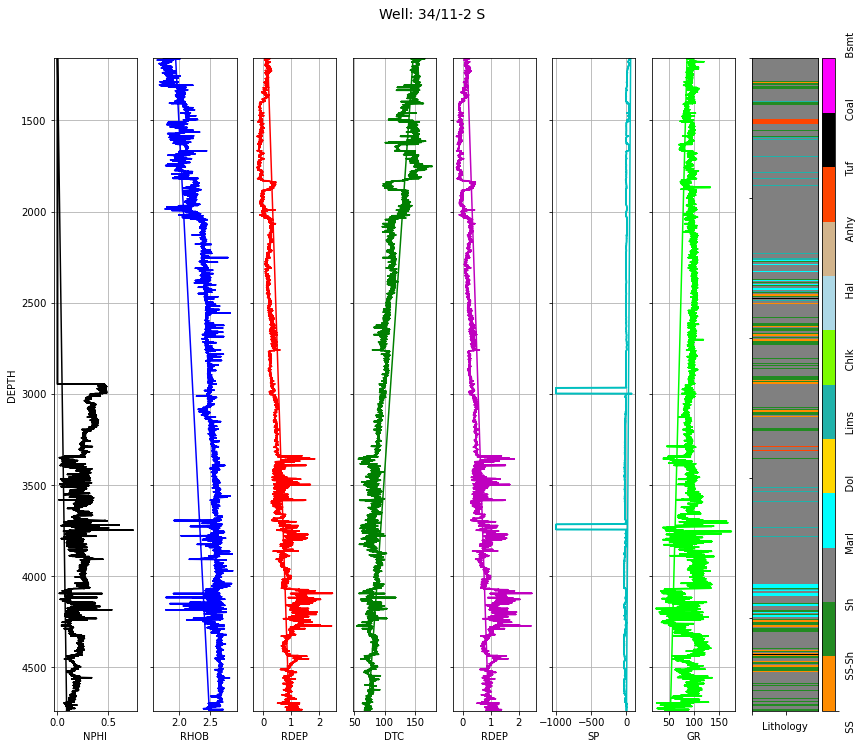

In [93]:
make_facies_log_plot(logs_df[well==train_wells[well_no]], logs, wells_names[well_no], facies_colors)

## 9. Wireline Logs Interpretation

Let us create a function that plots the logs and their interpretation using cut off lines and shading polygons.

In [94]:
def triple_combo(df, column_depth, column_GR, column_resistivity, 
                 column_NPHI, column_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=0.01, max_resistivity=1000, 
                 color_GR='black', color_resistivity='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):
  """
  Producing Triple Combo log

  Input:

  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)

  specify your depth limits; min_depth and max_depth

  input variables other than above are default. You can specify
  the values yourselves. 

  Output:

  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """
  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator  

  fig, ax=plt.subplots(1,3,figsize=(8,10))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')  

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()   

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)  

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black') 

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'lime', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()   

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)    

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')   

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()  

  ## NPHI curve 
  nphi=ax[2].twiny()
  nphi.set_xlim(-0.15,0.45)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')     

  ## RHOB curve 
  rhob=ax[2].twiny()
  rhob.set_xlim(1.95,2.95)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')

  plt.tight_layout(tight_layout)  
  plt.show() 

Example of well 15/9-13 interpretation.

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/2418084036.py:119: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



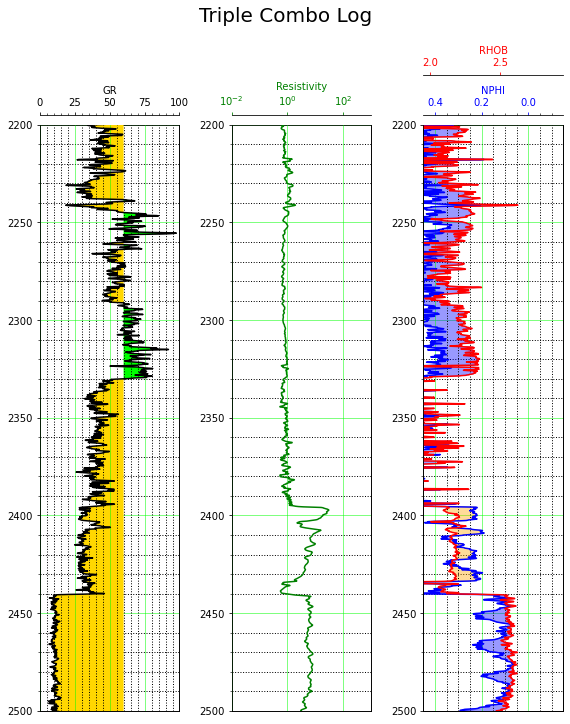

In [95]:
triple_combo(data_df.loc[data_df['WELL'] == '15/9-13'], 'DEPTH_MD', 'GR', 'RDEP', 'NPHI', 'RHOB', 
             min_depth=2200, max_depth=2500, 
             min_GR=0, max_GR=100, sand_GR_line=60,
             max_resistivity=1000,
             figsize=(8,8), title_size=20, title_height=1)

We can see that the wireline logs classify between the sands and shales using the gamma-ray on the far left. Moreover, the density and neuron wireline logs show the gas in the reservoir sands between depths of 2400 to 2440 meters.

Example of interpretation of well 34/2-4

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/2418084036.py:119: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



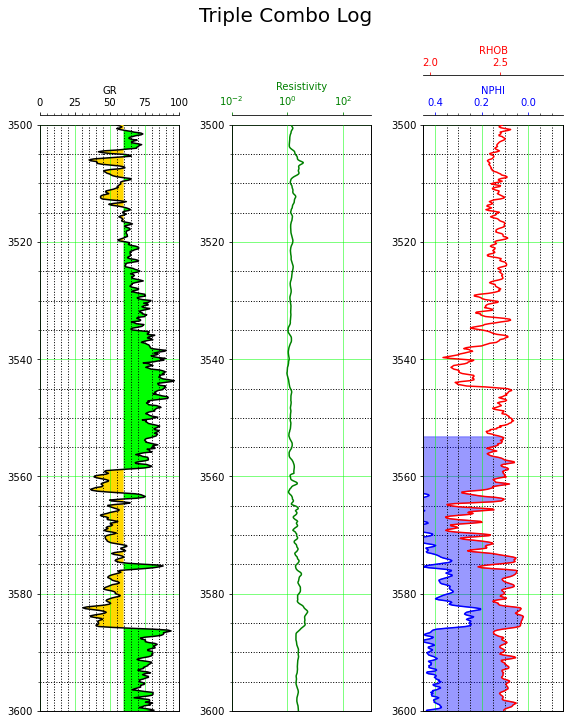

In [96]:
triple_combo(data_df.loc[data_df['WELL'] == '34/2-4'], 'DEPTH_MD', 'GR', 'RDEP', 'NPHI', 'RHOB', 
             min_depth=3500, max_depth=3600, 
             min_GR=0, max_GR=100, sand_GR_line=60,
             max_resistivity=1000,
             figsize=(8,8), title_size=20, title_height=1)

We can see that most of the section is shale (green), and the section between 3560 m to 3590 m is sandstone (yellow). However, the sandstone in this well has water with no possibility of hydrocarbons (oil or gas).

## 10. Lithology Correlation Matrix and map box

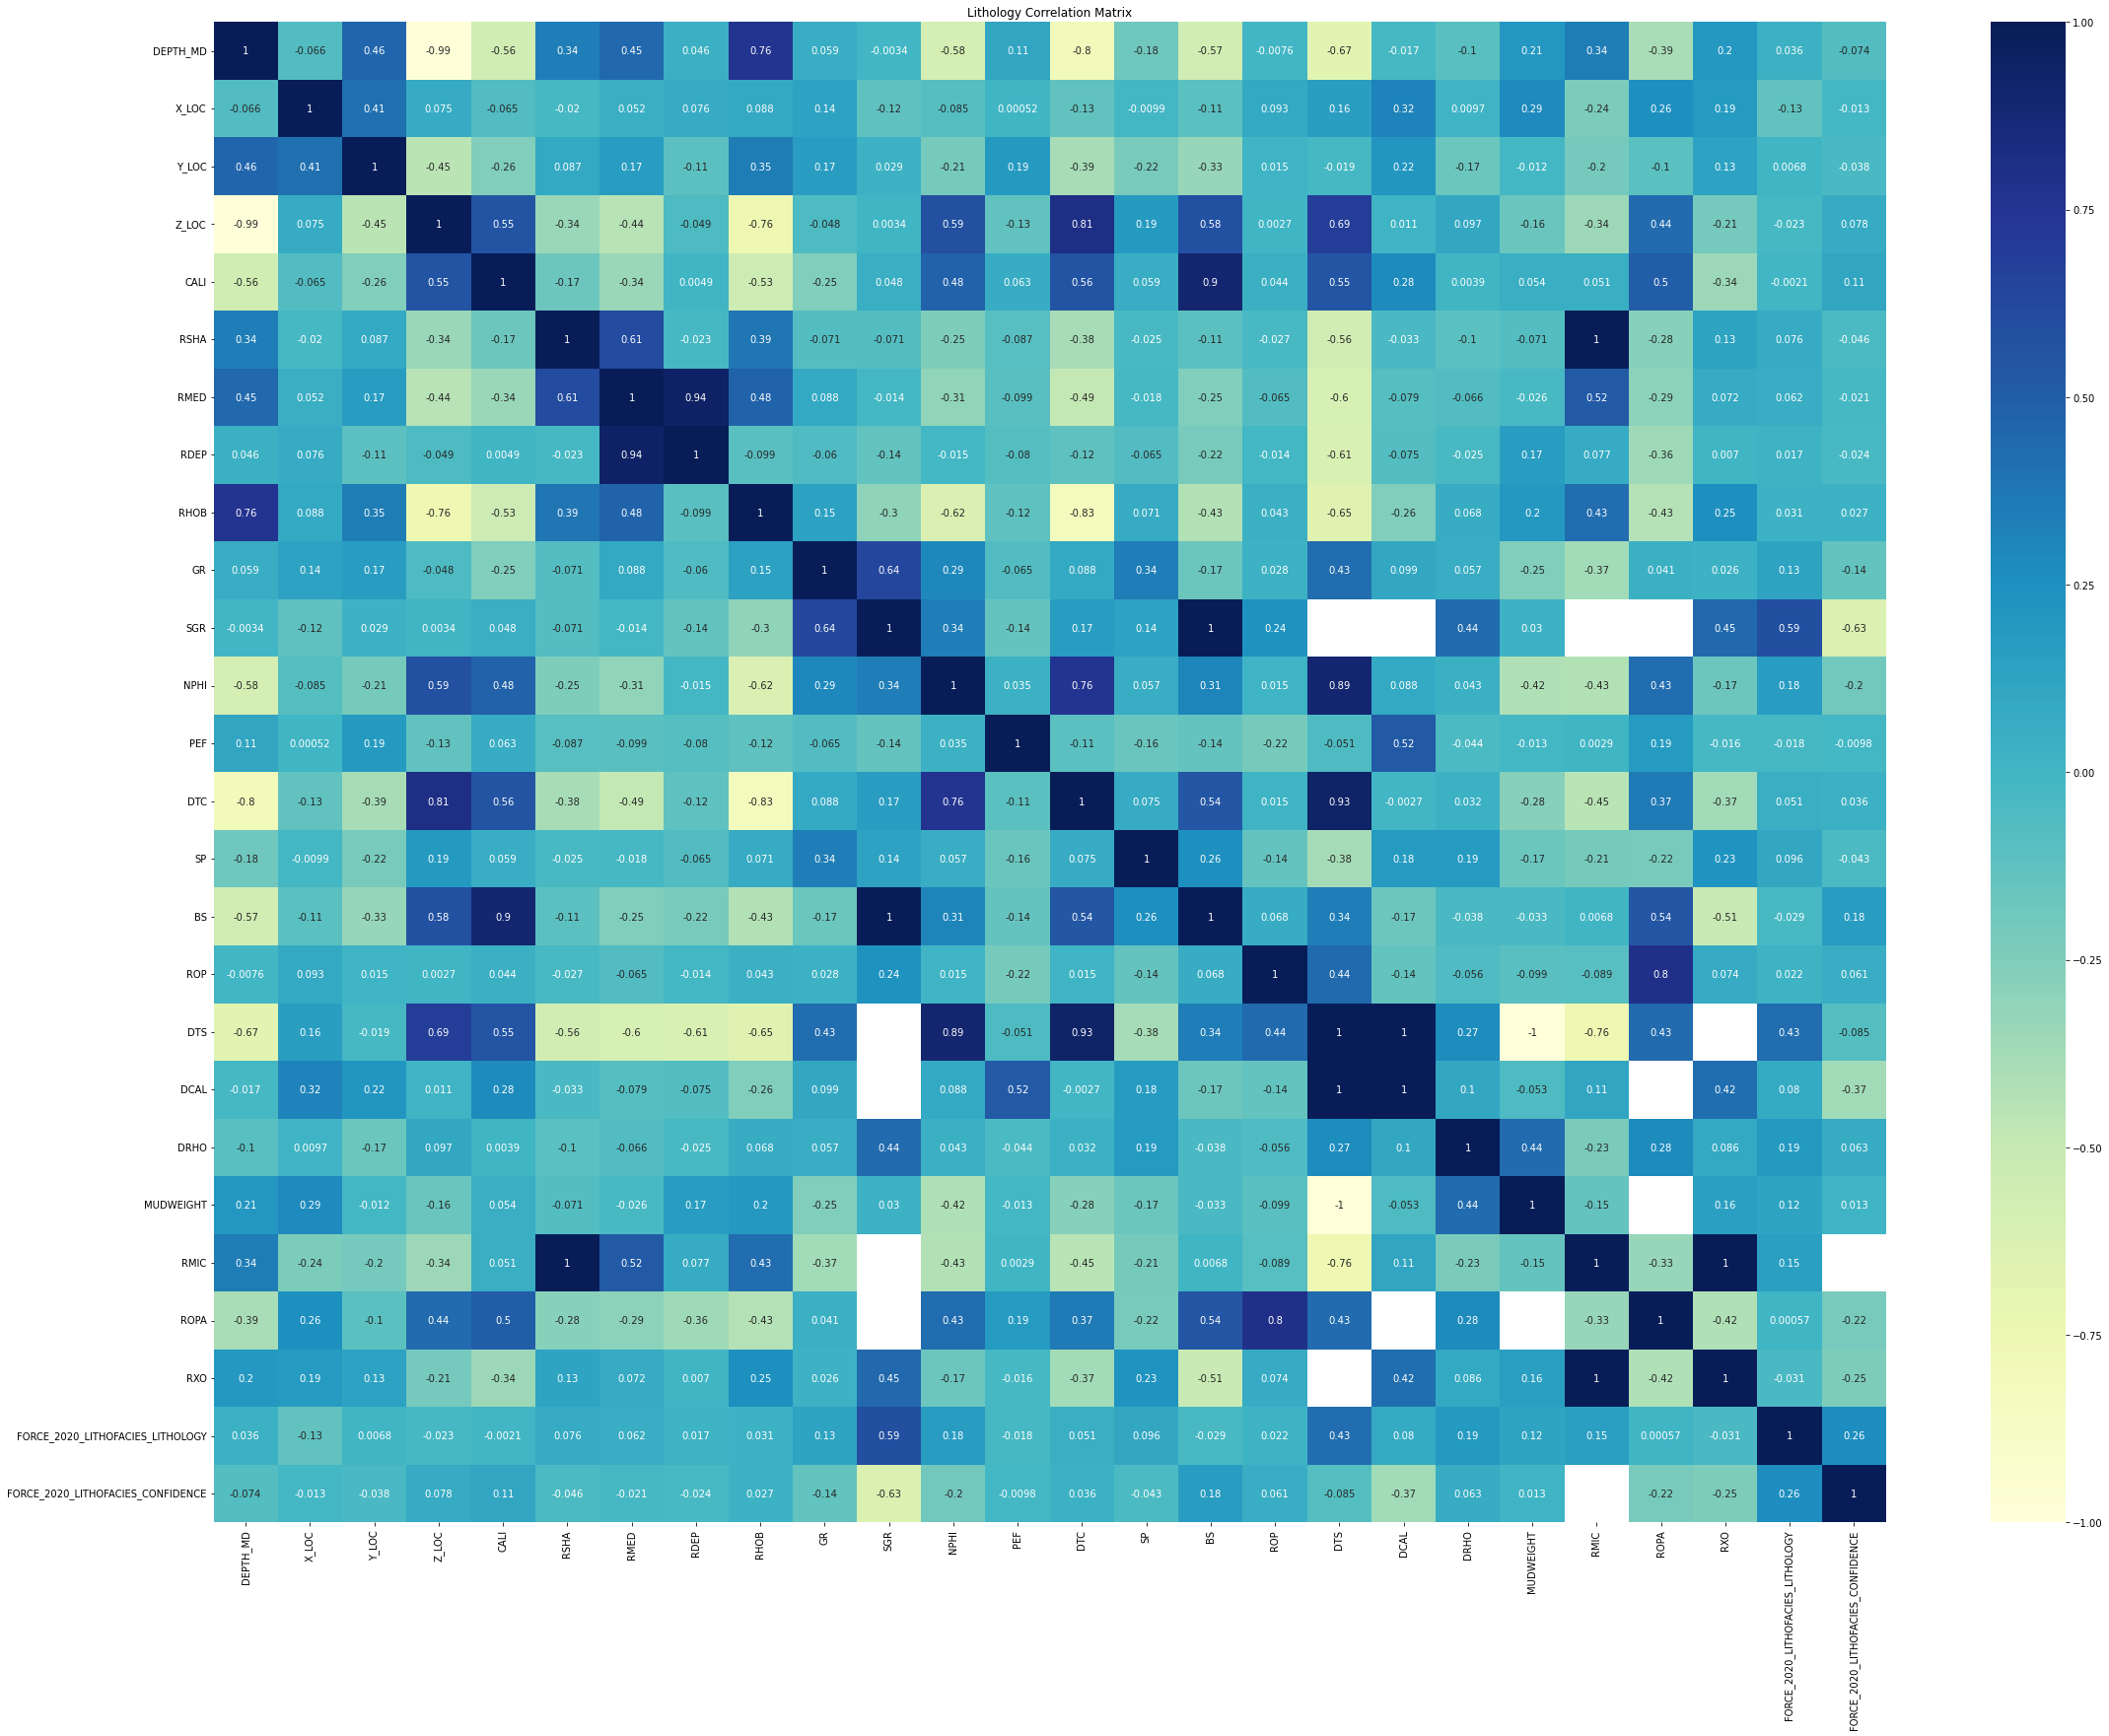

In [97]:
plt.figure(figsize=(38, 28))
sns.heatmap(data_df.sample(200).corr(), cmap='YlGnBu', annot=True)
plt.title('Lithology Correlation Matrix');

In [98]:
def drawscattermap(dataframe, title):
    # draw a map with points of the wells
    fig = px.scatter_mapbox(dataframe, 
                            lat = 'X_LOC', 
                            lon = 'Y_LOC', 
                            color = 'DEPTH_MD', 
                            width = 1000, 
                            height = 600, 
                            color_discrete_sequence = px.colors.qualitative.D3,
                            hover_name='WELL',
                            hover_data={'GR' : True},
#                                         'Alert' : False,
#                                         'Object' : False,
#                                         'Alert Date Time'  : False},
                            center={'lat': 70, 'lon': 0.6},
                            zoom = 2,
                            mapbox_style="carto-positron",
                            title=title)

    return fig.show()

In [99]:
title = 'Wells Location' 

In [100]:
loc_sample_df = data_df.dropna(subset=['X_LOC', 'Y_LOC'])
loc_sample_df.shape

(1159736, 30)

In [101]:
loc_sample_df['X_LOC'] = loc_sample_df['X_LOC'] / 1000
loc_sample_df['Y_LOC'] = loc_sample_df['Y_LOC'] / 10000000

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/3292797947.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\r04ra18\AppData\Local\Temp/ipykernel_10520/3292797947.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
drawscattermap(loc_sample_df.sample(4000), title)

## Conclusions

This study investigates methods to explore, analyses and visualisation wireline petrophysical log data using public Python libraries. We have used these libraries to identify missing data, imbalance classes and correlate between input data. Implementing exploratory data analysis before machine learning modelling is critical to understand the dataset and avoid any surprises.  

## References

1. Machine Predicted Lithology competition  by Force and Xeek 2020 Machine learning .  https://xeek.ai/challenges/force-well-logs/overview

2. (Bormann P., et al. 2020). 2020 FORCE Machine Learning Contest. https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition

3. Exploratory Data Analysis with Well Log Data by 
Andy McDonald 2020. https://towardsdatascience.com/exploratory-data-analysis-with-well-log-data-98ad084c4e7#:~:text=%20Exploratory%20Data%20Analysis%20with%20Well%20Log%20Data,have%20badhole%20data...%205%20Conclusions.%20%20More%20

## Future work

The future work of this project is applying machine learning modelling to the wireline dataset. The rising implementation of artificial intelligence in geosciences and the growth of machine learning modelling to solve subsurface interpretations problems are becoming increasingly essential and daily routine for accurate interpretations. 

##### By Ramy Abdallah